# Create images of individual spikes

In [93]:
from CustomFunctions import *
import os
import numpy as np
import matplotlib.pyplot as plt
# from glob import glob
import pandas as pd
import glob
import skimage
import cv2
from scipy import ndimage
import pathlib

In [94]:
# Define image folder
mypath = r'./Images/ShatNurseTROE2020'
Images = glob.glob(mypath + '/**/*.tif', recursive=True)

In [95]:
# Open an image and remove background

def SeparateSpikes(Image_Path, Outfile = None):
    
    # Remove bakground
    img0 = RemoveBackground(Image_Path)
    
    # Convert to gray
    gray0 = img0 @ [0.2126, 0.7152, 0.0722]

    # Threshold
    otsu = filters.threshold_otsu(gray0)
    bw0 = gray0 > otsu
    bw1 = morphology.remove_small_objects(bw0, min_size=1.5e-05 * gray0.shape[0] * gray0.shape[1])
    
    # Label spikes
    labeled_spks, num_spikes = label(bw1, return_num = True)
    
    # Loop through spikes
    for spk in range(1,num_spikes):
        
        # Select current spike
        myspk = labeled_spks == spk

        # Crop spike
        slice_x, slice_y = ndimage.find_objects(myspk)[0]
        cropped_spk = myspk[slice_x, slice_y]
        
        # Add 100 pixels to each border
        padded = np.pad(cropped_spk, ((100,100), (100,100)))
        
        # Save image 
        im = Image.fromarray(padded)
        
        if Outfile == None:
            
            Split_Path = Image_Path.split("\\")
            OutName = Split_Path[-1].replace(".tif", "")
            Split_Path = Split_Path[:-1]
            OutDir = '\\'.join([str(i) for i in Split_Path])
            OutDir = OutDir + "\\IndividualSpikes\\"
            path = pathlib.Path(OutDir)
            path.mkdir(parents=True, exist_ok=True)
            
            if spk < 10:
                OutName = OutDir + OutName + "_spk0" + str(spk) + '.jpg'
            else: 
                OutName = OutDir + OutName + "_spk" + str(spk) + '.jpg'
        
        im.save(OutName)


In [96]:
SeparateSpikes(Images[4])
# for spk in range(0,num_spikes):
#     print(spk)


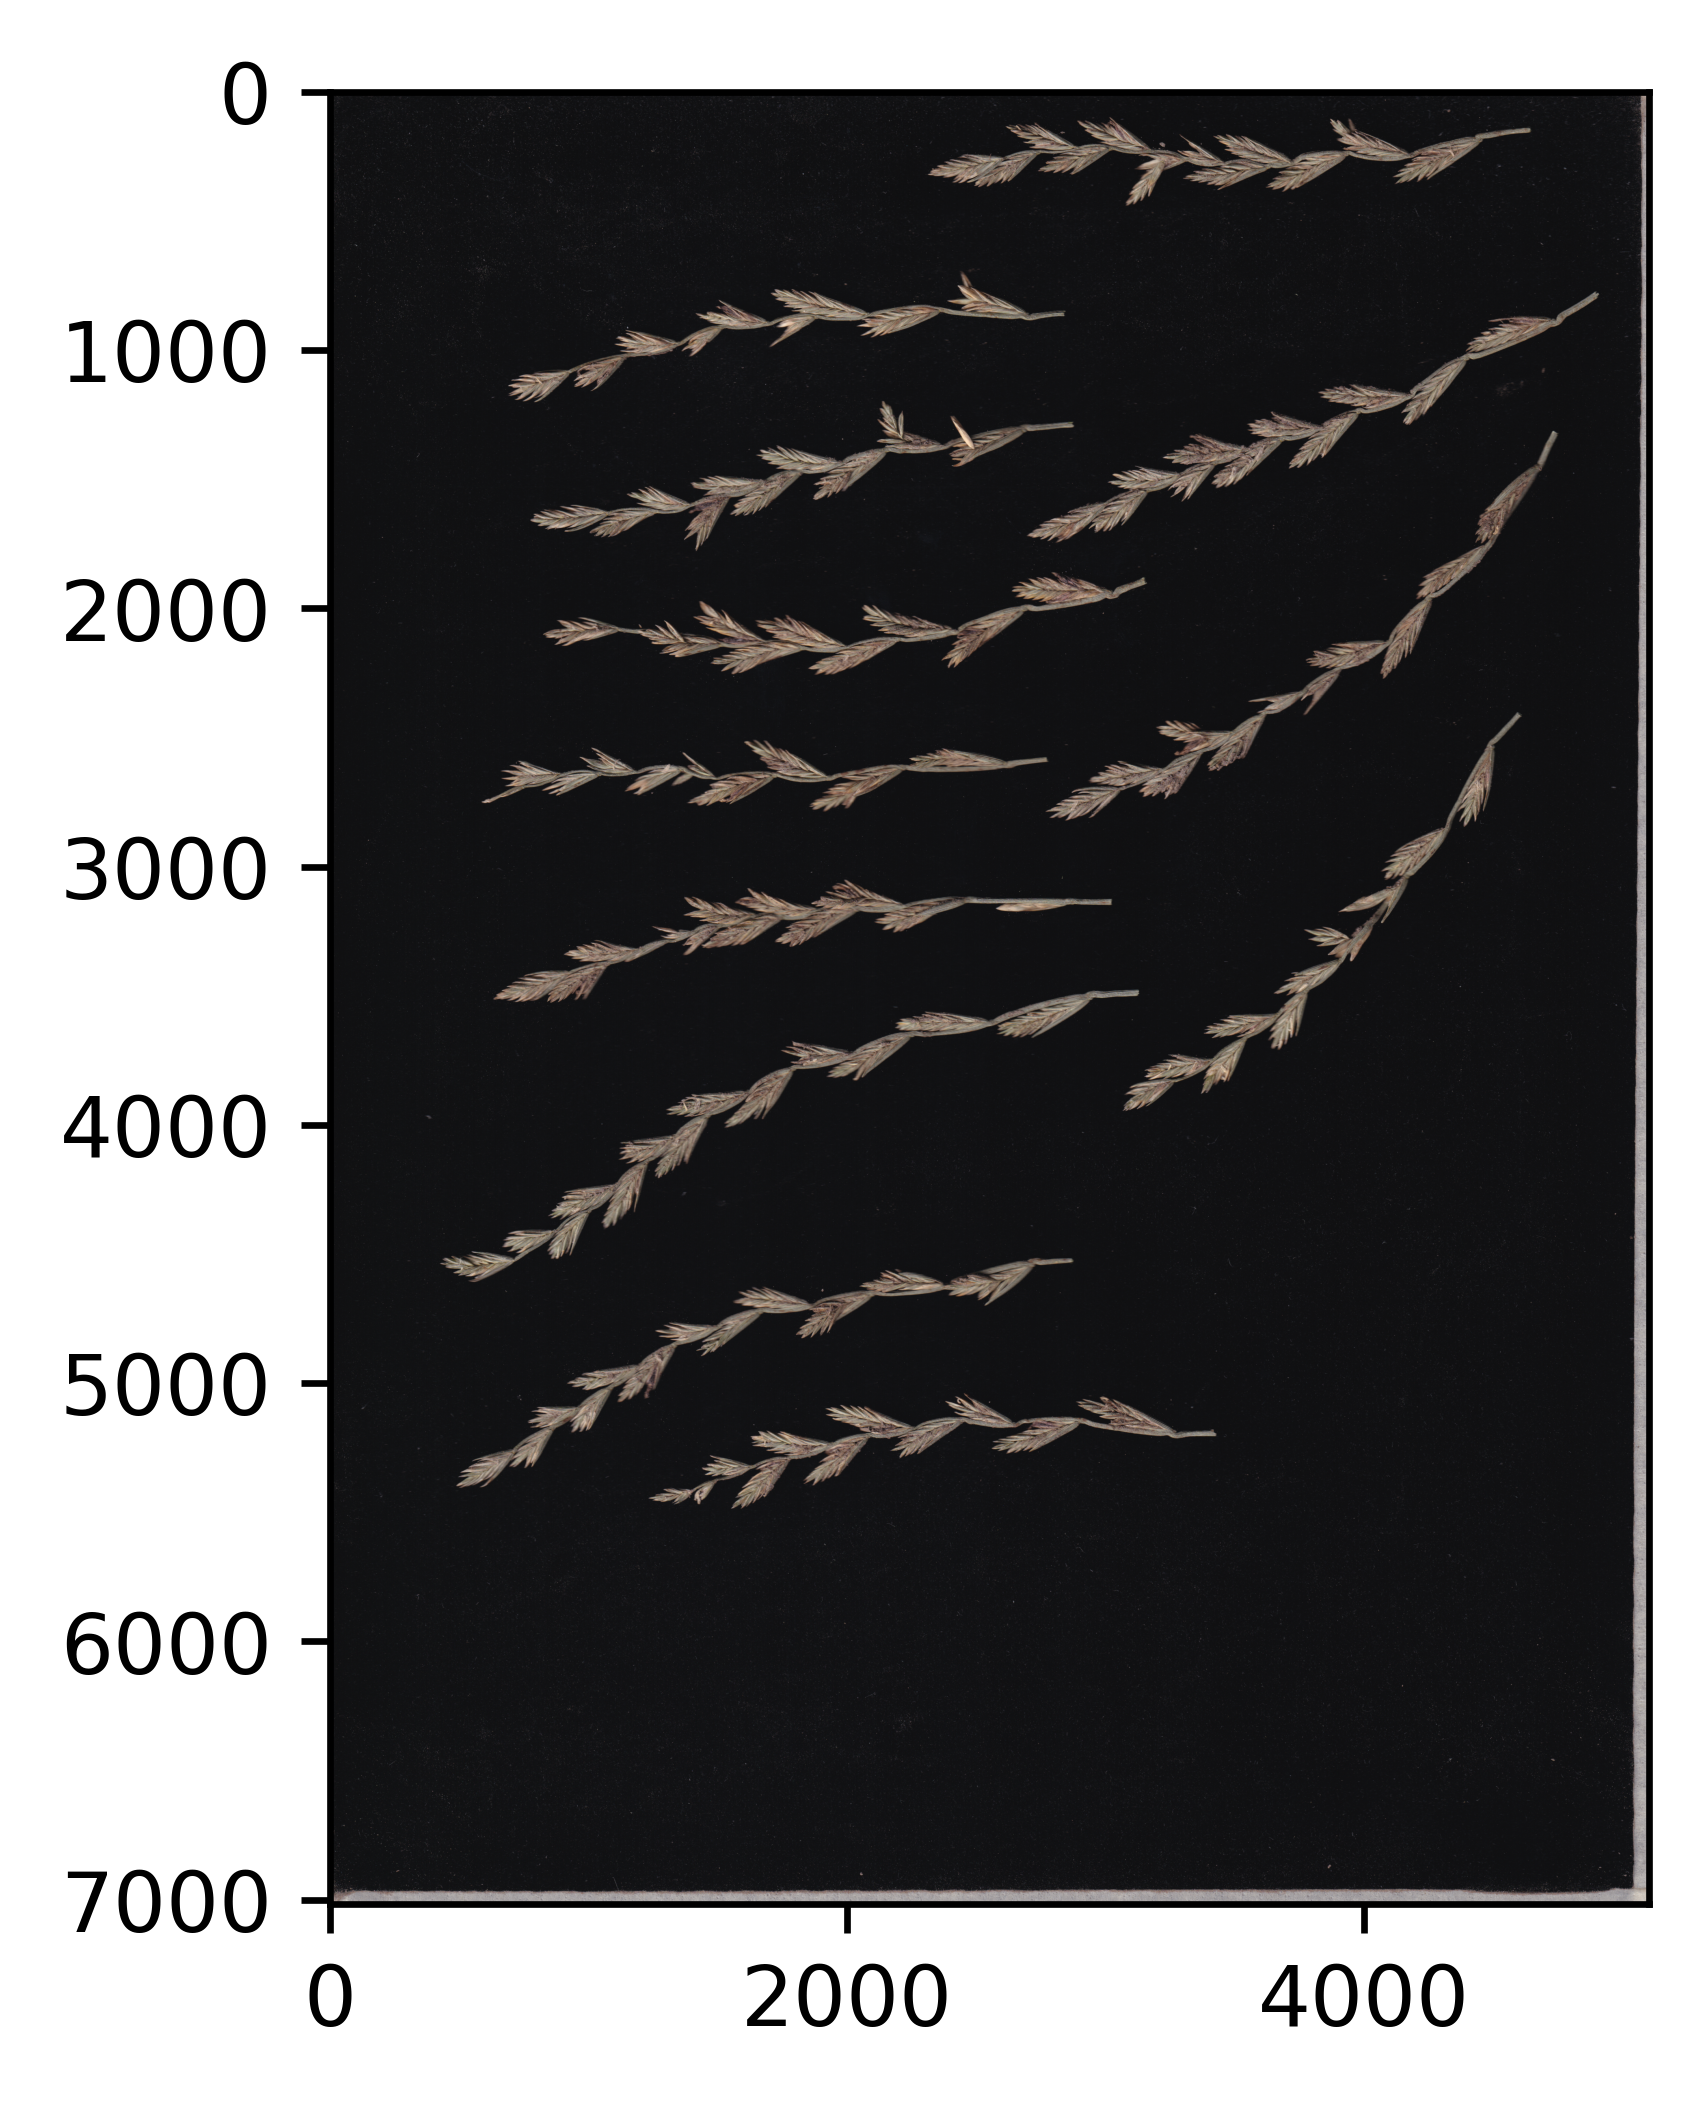

In [91]:
# Change the "%matplotlib inline" figure resolution on the notebook
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 600
plt.imshow(plt.imread(img0_name))

In [8]:
# Convert to gray
gray0 = img0 @ [0.2126, 0.7152, 0.0722]

# Get Lab values
# Lab = color.rgb2lab(img0)
    
# Threshold
otsu = filters.threshold_otsu(gray0)
bw0 = gray0 > otsu
bw1 = morphology.remove_small_objects(bw0, min_size=1.5e-05 * gray0.shape[0] * gray0.shape[1])

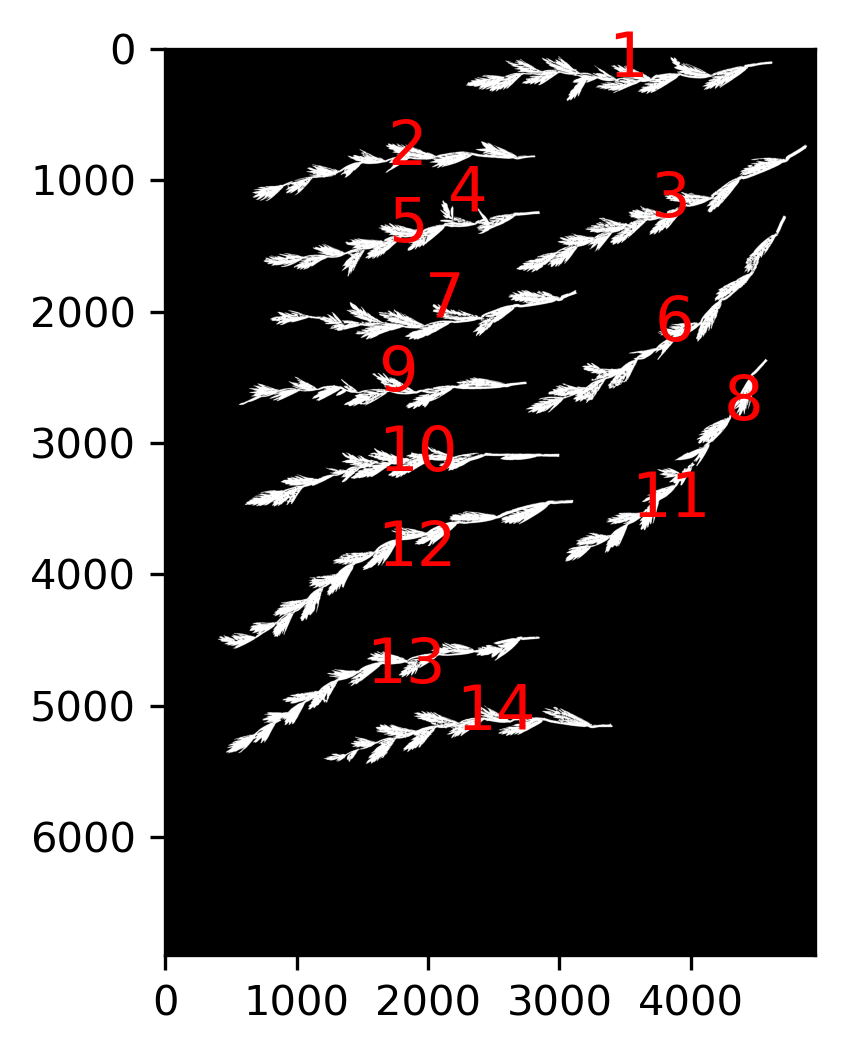

In [9]:
# Regionprops
labeled_spks, num_spikes = label(bw1, return_num = True)
props_spikes = regionprops(labeled_spks)


# Visualize spike number
fig, ax = plt.subplots()
ax.imshow(bw1, cmap=plt.cm.gray)
spike_ind = 0

for props in props_spikes:
    y0, x0 = props.centroid
    spike_ind = spike_ind + 1
    plt.text(x0, y0, str(spike_ind), color="red", fontsize=15)

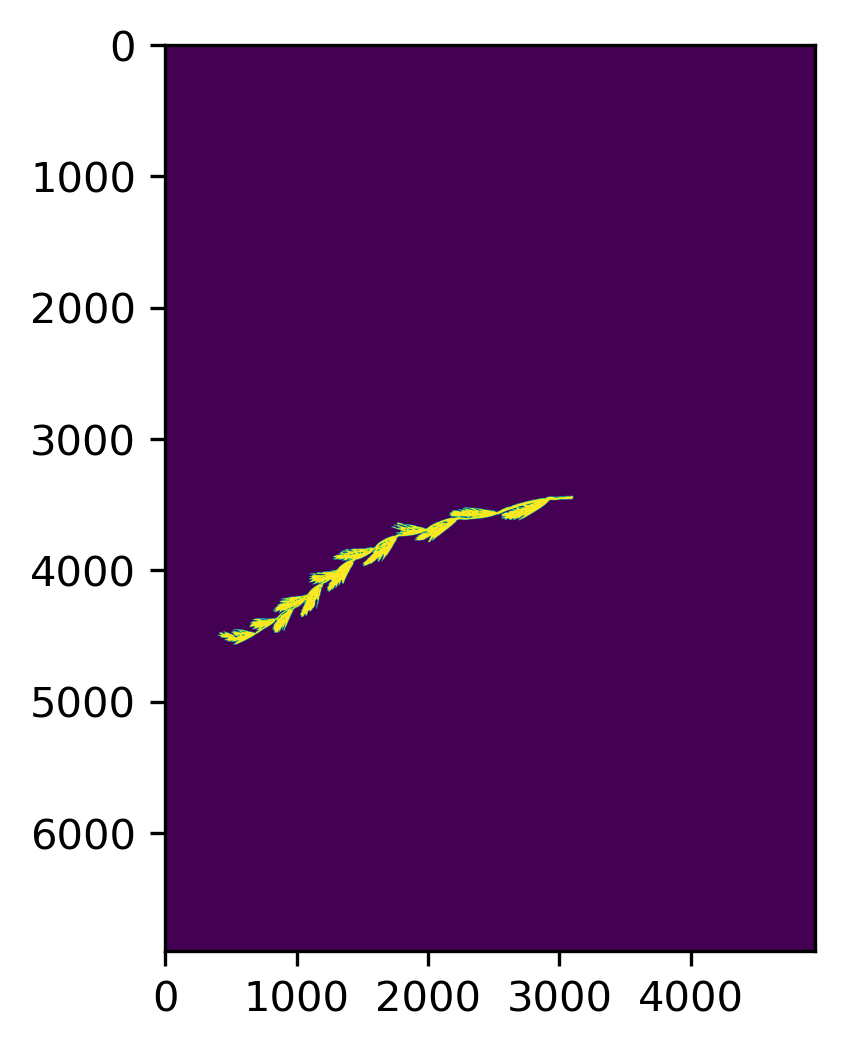

In [10]:
bw2 = labeled_spks == 12
# plt.imshow(bw2)
# bw2 = bw2[500:1500, 1000:3500]
plt.imshow(bw2)

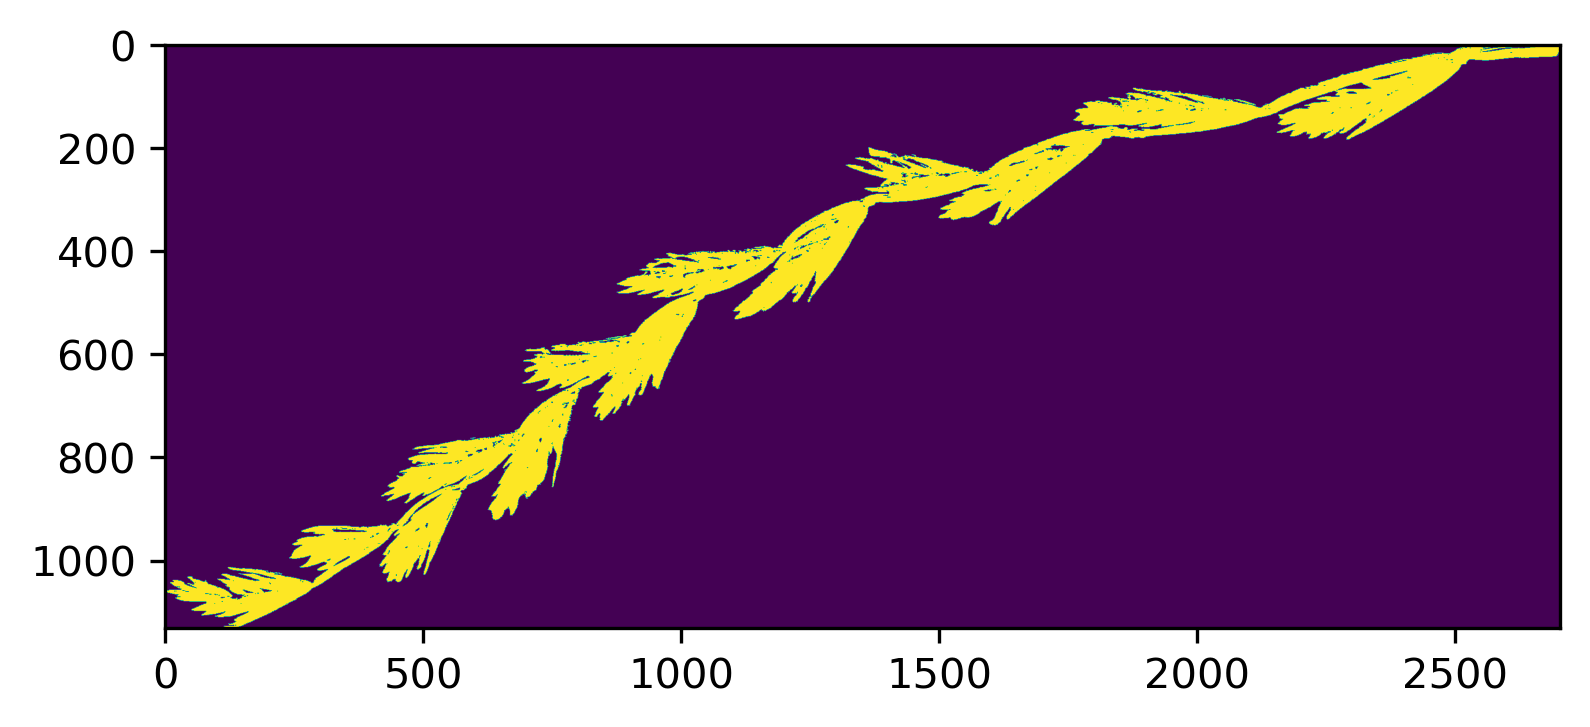

In [12]:
# Crop bw image
slice_x, slice_y = ndimage.find_objects(bw2)[0]
bw3 = bw2[slice_x, slice_y]
# plt.imshow(bw3)

padded = np.pad(bw3, ((100,100), (100,100)))
plt.imshow(padded)



In [19]:
img0_name

'./Images/ShatNurseTROE2020\\H2B2\\207_12.tif'

In [ ]:
im = Image.fromarray(padded)
out_image = '.\\Images\\IndividualSpikes\\' + img_name + ''
im.save(out_image)

In [14]:
bw2 = np.uint8(bw2)
contours, hier = cv2.findContours(bw2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [15]:
cnt = contours[0]
M = cv2.moments(cnt)
print(M)

{'m00': 201104.0, 'm10': 231478120.3333333, 'm01': 119706160.66666666, 'm20': 344165979910.6666, 'm11': 158082805229.41666, 'm02': 77529979008.0, 'm30': 587636846401268.9, 'm21': 251949965713902.25, 'm12': 112824112161272.95, 'm03': 53303129829398.2, 'mu20': 77726126933.83304, 'mu11': 20296599766.37268, 'mu02': 6275479338.4071045, 'mu30': 12557834351442.125, 'mu21': 362599906445.09375, 'mu12': -578653947285.3252, 'mu03': -317102485734.0469, 'nu20': 1.921877089909544, 'nu11': 0.5018591769954208, 'nu02': 0.15516918756227738, 'nu30': 0.6924094361760604, 'nu21': 0.01999290560400706, 'nu12': -0.03190561701706727, 'nu03': -0.017484284886424235}


In [16]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

area = cv2.contourArea(cnt)

perimeter = cv2.arcLength(cnt,True)

k = cv2.isContourConvex(cnt)

epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon, True)

NameError: name 'h' is not defined

In [18]:
x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(bw2,(x,y),(x+w,y+h),(0,255,0),2)

cv2.imshow('img', bw2)
cv2.waitKey()

rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(bw2[box],0,(0,0,255),2)
# plt.imshow(bw2)

cv2.imshow('img', bw2)


IndexError: index 2455 is out of bounds for axis 0 with size 1000

In [19]:
h

705